# PRÁCTICA 1 TID: CLASIFICACIÓN
## Raúl González Acosta ([alu0101543529](mailto:alu0101543529@ull.edu.es))
---

# Sin tratar los datos

En primer lugar, **cargamos las librerías** que vamos a utilizar a lo largo de todo el cuaderno.
Las que vamos a utilizar son:
- `pandas`: para procesar los datos de un archivo csv.
- `numpy`: para realizar operaciones matemáticas y algebraicas.
- `matplotlib`: para realizar gráficos.
- `seaborn`: para realizar gráficos interactivos.
- `sklearn`: para realizar el modelo de regresión lineal.
- `pydotplus`: para visualizar archivos .dot, más concretamente, el árbol de decisión.

In [ ]:
%pip install pandas numpy matplotlib seaborn scikit-learn pydotplus

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

%matplotlib inline 
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import export_graphviz
from io import StringIO
from IPython.display import Image
import pydotplus
from sklearn.preprocessing import LabelEncoder

Ahora, **cargamos los datos** del fichero `csv`.

In [2]:
dataframe = pd.read_csv(r"dataframe/homeLoanAproval.csv",sep=',')
# Mostramos los diez primeros elementos para ver que variables tenemos
dataframe.head(10)

Loan_ID Gender Married Dependents     Education SelfEmployed  \
0  LP001002   Male      No          0      Graduate           No   
1  LP001003   Male     Yes          1      Graduate           No   
2  LP001005   Male     Yes          0      Graduate          Yes   
3  LP001006   Male     Yes          0  Not Graduate           No   
4  LP001008   Male      No          0      Graduate           No   
5  LP001011   Male     Yes          2      Graduate          Yes   
6  LP001013   Male     Yes          0  Not Graduate           No   
7  LP001014   Male     Yes         3+      Graduate           No   
8  LP001018   Male     Yes          2      Graduate           No   
9  LP001020   Male     Yes          1      Graduate           No   

   ApplicantIncome CoapplicantIncome  LoanAmount  LoanAmountTerm PropertyArea  \
0             5849                 0         NaN           360.0        Urban   
1             4583              1508       128.0           360.0        Rural   
2             3000                 0        66.0           360.0        Urban   
3             2583              2358       120.0           360.0        Urban   
4             6000                 0       141.0           360.0        Urban   
5             5417              4196       267.0           360.0        Urban   
6             2333              1516        95.0           360.0        Urban   
7             3036              2504       158.0           360.0    Semiurban   
8             4006              1526       168.0           360.0        Urban   
9            12841             10968       349.0           360.0    Semiurban   

  LoanStatus  
0          Y  
1          N  
2          Y  
3          Y  
4          Y  
5          Y  
6          Y  
7          N  
8          Y  
9          N

<Axes: >

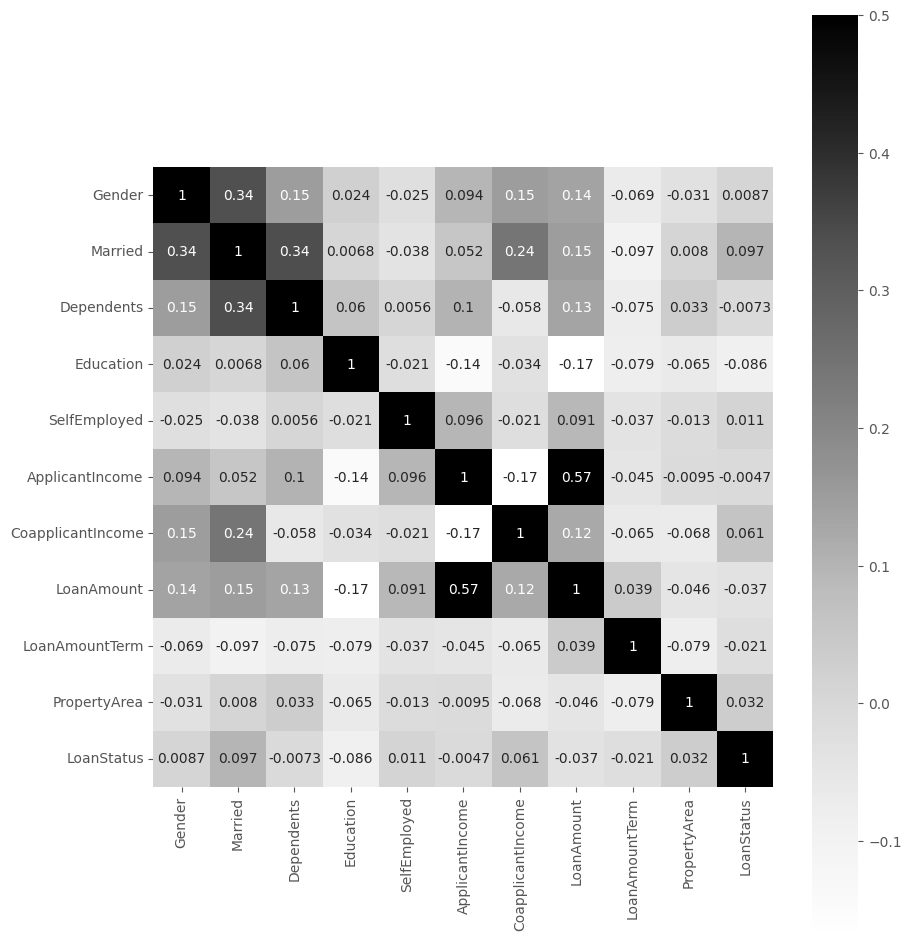

In [29]:
# Eliminamos la columna Loan_ID antes de calcular la matriz de correlación
dataframe = dataframe.drop('Loan_ID', axis=1)

# Convertimos las variables categóricas a numéricas
le = LabelEncoder()
for col in dataframe.columns:
	if dataframe[col].dtype == 'object':
		dataframe[col] = le.fit_transform(dataframe[col])

# Mostramos la matriz de correlación para ver la relación que guardan las variables entre sí
matrix = dataframe.corr()
f, ax = plt.subplots(figsize=(10, 12))
sns.heatmap(matrix, vmax=.5, square=True, cmap="Greys", annot=True)

Como en este caso no estamos tratando los datos, lo que haremos a continución es **borrar** cualquier fila que contenga algún valor incorrecto.

In [ ]:
# Borramos las filas a las que les falta algún dato
dataframe.dropna(how="any", inplace=True)

# Borramos las filas que tienen algún dato defectuso, como '3+'
dataframe = dataframe[dataframe.Dependents != '3+']
# Lo convertimos en una variable numérica
dataframe['Dependents'] = dataframe['Dependents'].apply(pd.to_numeric)

# Borramos filas de Coaplicant que no tengan un valor numérico válido, como números con puntos como separador.
dataframe = dataframe[dataframe['CoapplicantIncome'].astype(str).str.contains(r'^\d+(\.\d+)?$', regex=True)]
# Lo convertimos en una variable numérica
dataframe['CoapplicantIncome'] = dataframe['CoapplicantIncome'].apply(pd.to_numeric)

Comprobamos que los **tipos** de cada variable son los correctos.

In [42]:
# Resumen de los tipos de datos
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 268 entries, 1 to 611
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            268 non-null    object 
 1   Gender             268 non-null    object 
 2   Married            268 non-null    object 
 3   Dependents         268 non-null    int64  
 4   Education          268 non-null    object 
 5   SelfEmployed       268 non-null    object 
 6   ApplicantIncome    268 non-null    int64  
 7   CoapplicantIncome  268 non-null    int64  
 8   LoanAmount         268 non-null    float64
 9   LoanAmountTerm     268 non-null    float64
 10  PropertyArea       268 non-null    object 
 11  LoanStatus         268 non-null    object 
dtypes: float64(2), int64(3), object(7)
memory usage: 27.2+ KB


Puesto que no estamos tratando los datos, todas las columnas **categóricas** las vamos a quitar; pues para usarlas tendríamos que hacer modificaciones.

In [43]:
# Eliminamos todas las columnas categóricas
dataframe = dataframe.drop('Gender', axis=1)
dataframe = dataframe.drop('Married', axis=1)
dataframe = dataframe.drop('Education', axis=1)
dataframe = dataframe.drop('SelfEmployed', axis=1)
dataframe = dataframe.drop('PropertyArea', axis=1)
# Quitamos también el LOAN_ID, pues no nos aporta información relevante
dataframe = dataframe.drop('Loan_ID', axis=1)

In [44]:
# Comprobamos que las variables categóricas han sido eliminadas correctamente
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 268 entries, 1 to 611
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Dependents         268 non-null    int64  
 1   ApplicantIncome    268 non-null    int64  
 2   CoapplicantIncome  268 non-null    int64  
 3   LoanAmount         268 non-null    float64
 4   LoanAmountTerm     268 non-null    float64
 5   LoanStatus         268 non-null    object 
dtypes: float64(2), int64(3), object(1)
memory usage: 14.7+ KB


Visto que ya tenemos nuestro dataframe "preparado", vamos a realizar los grupos de **entrenamiento** y de **testeo**. De nuevo, como no estamos realizando una preparación previa, separamos completamente al azar.

In [45]:
x = dataframe.drop('LoanStatus', axis=1)
y = dataframe['LoanStatus'].values

In [46]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

En este paso no vamos a **escalar** los datos, por tanto pasamos directamente a los algoritmos de clasificación.

## K-Nearest Neighbours (K-NN)

En primera instancia estableceremos el número de vecinos al **azar**. Más adelnate lo **ajustaremos** al más apropiado.

In [ ]:
n_neighbors = 7

knn = KNeighborsClassifier(n_neighbors)
knn.fit(x_train, y_train)

In [48]:
# Mostramos la precisión del modelo con los datos de entrenamiento y de test
print('Accuracy of K-NN classifier on training set: {:.2f}'.format(knn.score(x_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'.format(knn.score(x_test, y_test)))

Accuracy of K-NN classifier on training set: 0.77
Accuracy of K-NN classifier on test set: 0.69


Aparentemente nuestro clasificador es considerablemente bueno, sin embargo, observemos la **matriz de confusión** del mismo.

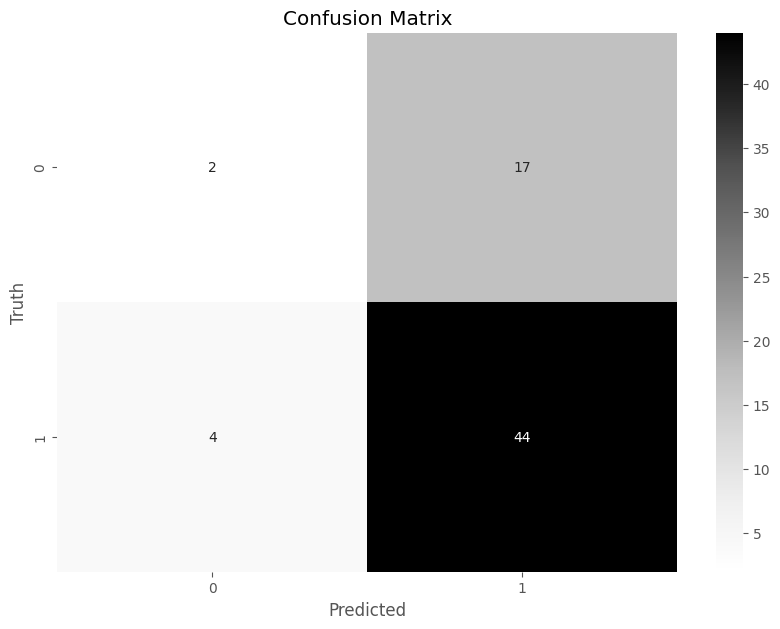

In [49]:
# Calculamos la matriz de confusión
pred = knn.predict(x_test)
cm = confusion_matrix(y_test, pred)

# Visualizamos la matriz de confusión
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greys')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Truth')

plt.show()

Aquí podemos ver que realmente nuestro clasificador **no está realizando un buen trabajo**:
- El modelo predijo correctamente que 2 instancias eran de la clase 'N' (verdaderos negativos).
- El modelo predijo incorrectamente que 17 instancias eran de la clase 'Y' cuando en realidad eran de la clase 'N' (falsos positivos).
- El modelo predijo incorrectamente que 4 instancias eran de la clase 'N' cuando en realidad eran de la clase 'Y' (falsos negativos).
- El modelo predijo correctamente que 44 instancias eran de la clase 'Y' (verdaderos positivos).    

Es decir, nuestro modelo **tiende a clasificar todo como "sí"**, así que no es un buen modelo, por lo que vamos a probar con otro.

## Árbol de clasificación

Probemos ahora un **árbol de clasificación**.

In [50]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

In [51]:
clf = DecisionTreeClassifier()
clf = clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

In [52]:
print('Accuracy of classifier on training set: {:.2f}'.format(clf.score(x_train, y_train)))
print('Accuracy of classifier on test set: {:.2f}'.format(clf.score(x_test, y_test)))

Accuracy of classifier on training set: 1.00
Accuracy of classifier on test set: 0.57


Podemos ver que nuestro árbol está **muy ajustado** a los datos con los que está entrenando, por lo tanto observemos su **matriz de confusión**.

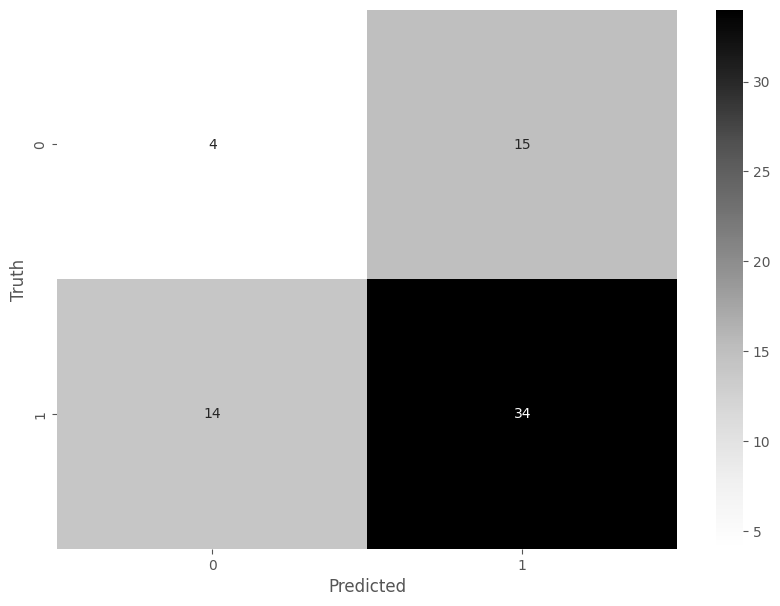

In [53]:
pred = clf.predict(x_test)
cm = confusion_matrix(y_test, pred)

# Visualizar la matriz de confusión
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greys')
plt.xlabel('Predicted')
plt.ylabel('Truth')

plt.show()

Es cierto que ahora *clasifica menos en sí*, pero seguimos teniendo una muy mala predicción, pasemos a ver el árbol generado.

In [54]:
dataframe.head()

Dependents  ApplicantIncome  CoapplicantIncome  LoanAmount  LoanAmountTerm  \
1           1             4583               1508       128.0           360.0   
3           0             2583               2358       120.0           360.0   
5           2             5417               4196       267.0           360.0   
6           0             2333               1516        95.0           360.0   
8           2             4006               1526       168.0           360.0   

  LoanStatus  
1          N  
3          Y  
5          Y  
6          Y  
8          Y

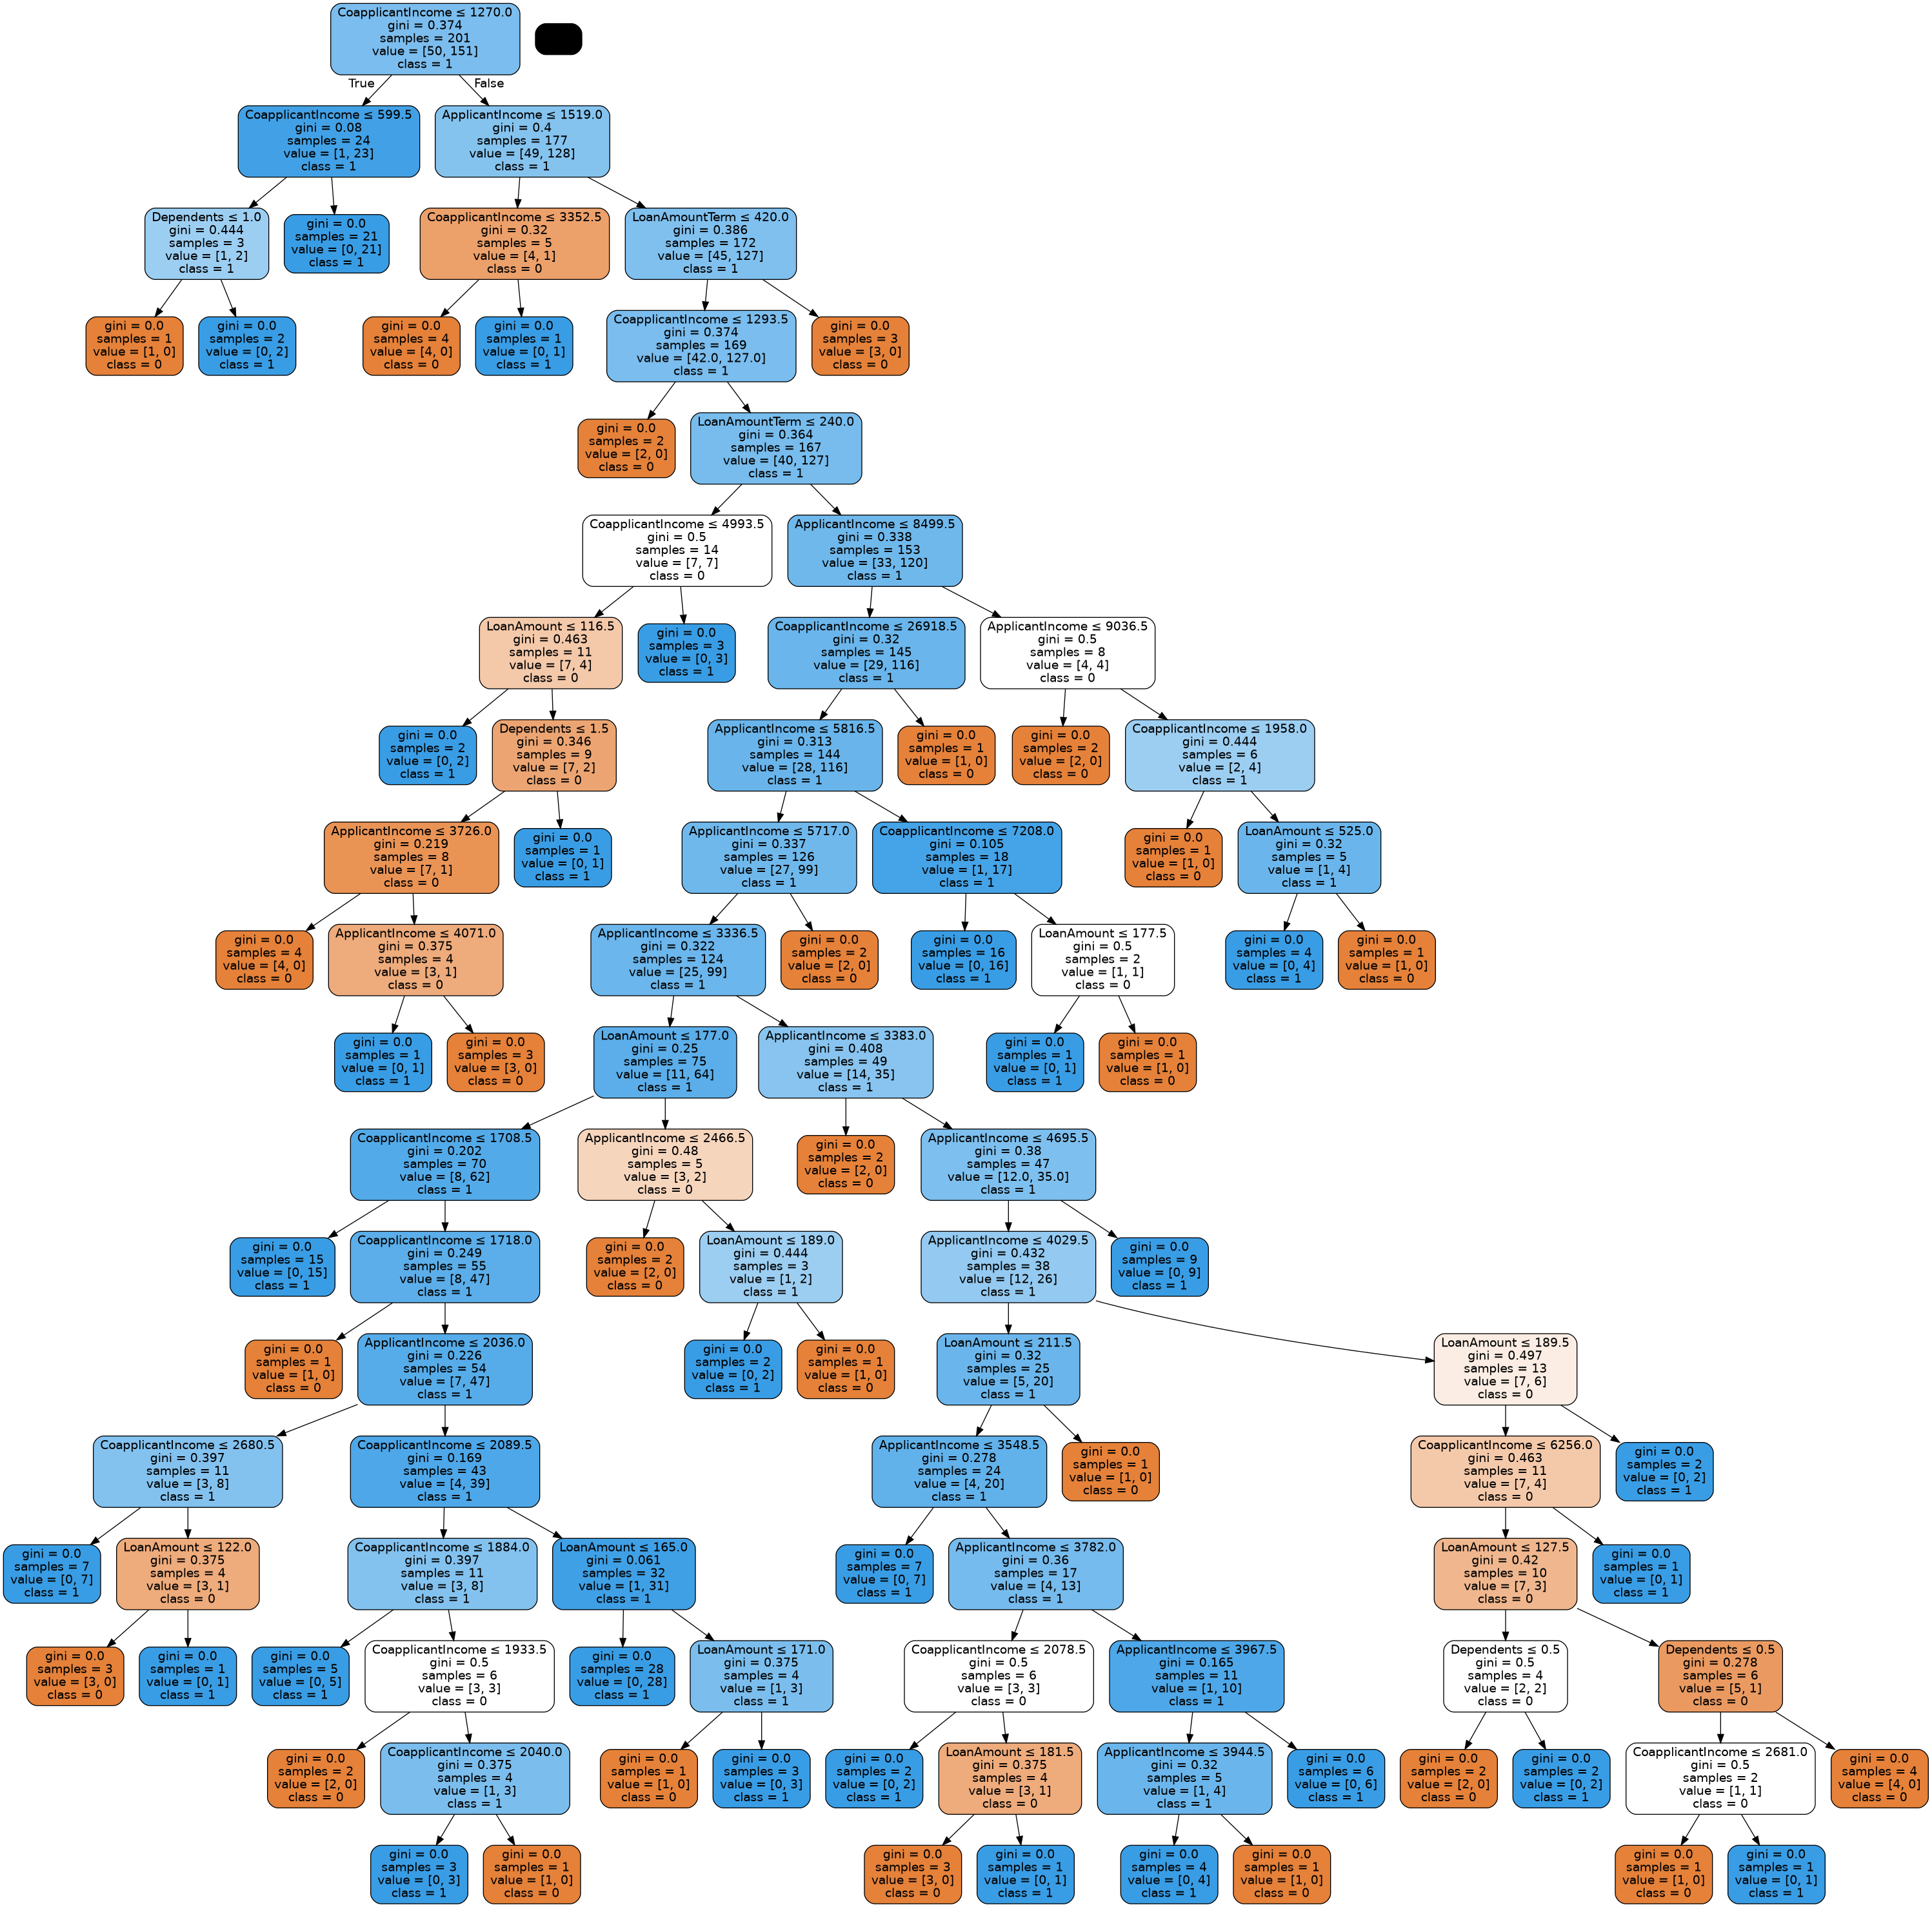

In [55]:
feature_cols = ['Dependents', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','LoanAmountTerm']

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, 
                rounded=True,
                special_characters=True,
                feature_names = feature_cols,
                class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('images/big-tree.png')
Image(graph.create_png())

Vemos que el árbol generado es muy grande, por tanto procedemos a intentar **podarlo** para tratar de conseguir la misma predicción pero con muchos menos nodos.

In [56]:
# Creamos un clasificador de árbol de decisión con una profundidad máxima de 3
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

clf = clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)

print('Accuracy of CT classifier on training set: {:.2f}'.format(clf.score(x_train, y_train)))
print('Accuracy of CT classifier on test set: {:.2f}'.format(clf.score(x_test, y_test)))

Accuracy of CT classifier on training set: 0.79
Accuracy of CT classifier on test set: 0.67


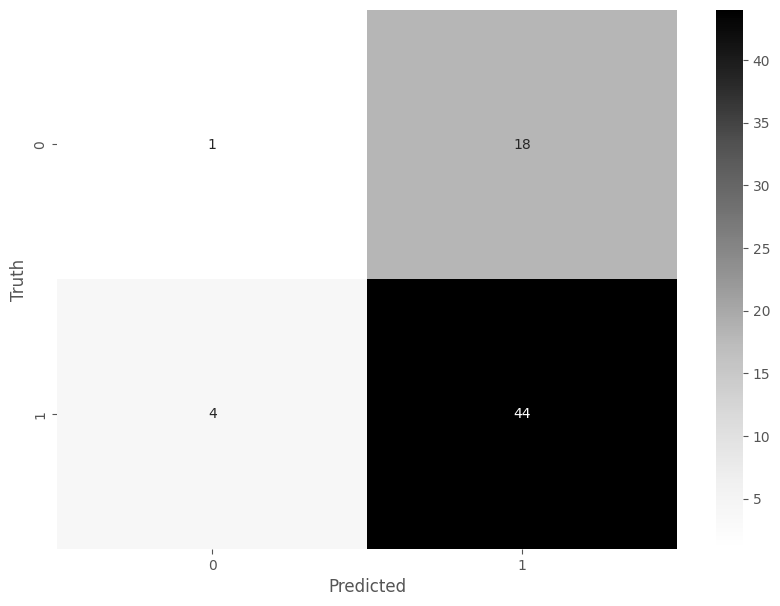

In [57]:
pred = clf.predict(x_test)
cm = confusion_matrix(y_test, pred)

# Visualizar la matriz de confusión
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greys')
plt.xlabel('Predicted')
plt.ylabel('Truth')

plt.show()

Podemos ver que el *cambio no es muy sustancial*, puesto que la predicción sigue sin ser muy precisa. Procedamos a dibujar el árbol de decisión.

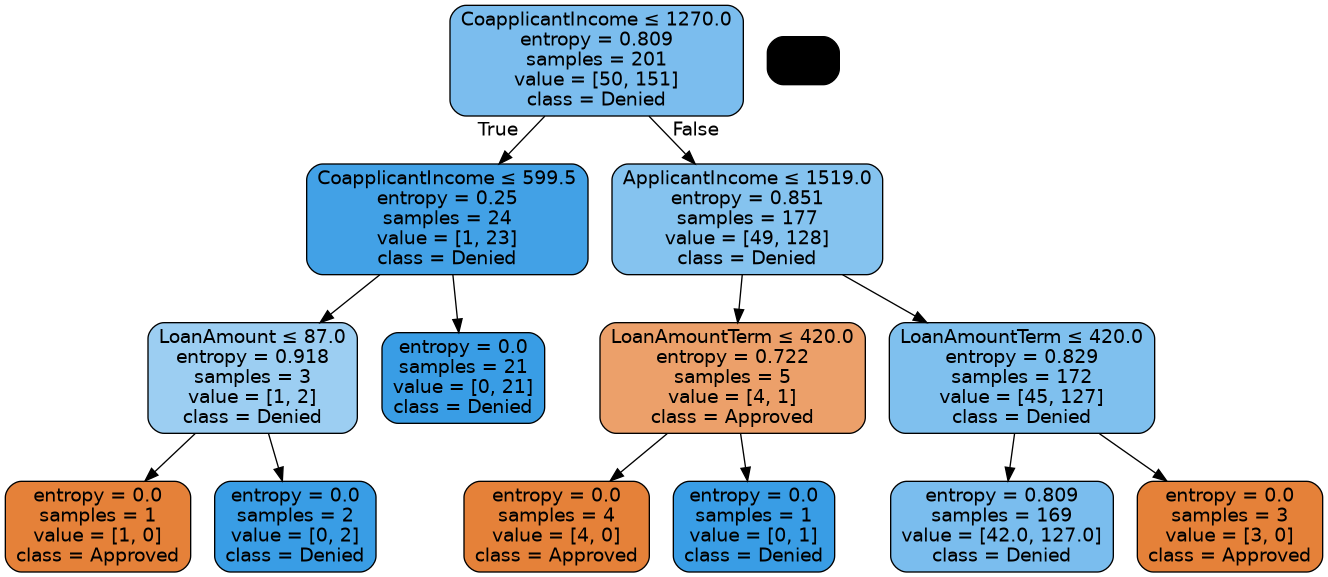

In [58]:
feature_cols = ['Dependents', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','LoanAmountTerm']

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                class_names=['Approved', 'Denied'],
                filled=True, 
                rounded=True,
                special_characters=True,
                feature_names = feature_cols)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('images/tree-with-depth-3.png')
Image(graph.create_png())

Este árbol es mucho **más comprensible** que el anterior, puesto que tiene menos nodos y es más sencillo de seguir.

## Naive Bayes

Pasemos ahora a realizar este mismo problema con el clasificador **naive Bayes**. De nuevo, comenzamos preparando nuestros conjuntos para la validación cruzada.

In [59]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=10)

In [60]:
nv = GaussianNB()
nv = nv.fit(x_train, y_train)
y_pred = nv.predict(x_test)

In [61]:
# Mostramos los resultados
print('Accuracy of classifier on training set: {:.2f}'.format(nv.score(x_train, y_train)))
print('Accuracy of classifier on test set: {:.2f}'.format(nv.score(x_test, y_test)))

Accuracy of classifier on training set: 0.71
Accuracy of classifier on test set: 0.70


Observemos a ver que **matriz de confusión** tiene este nuevo clasificador.

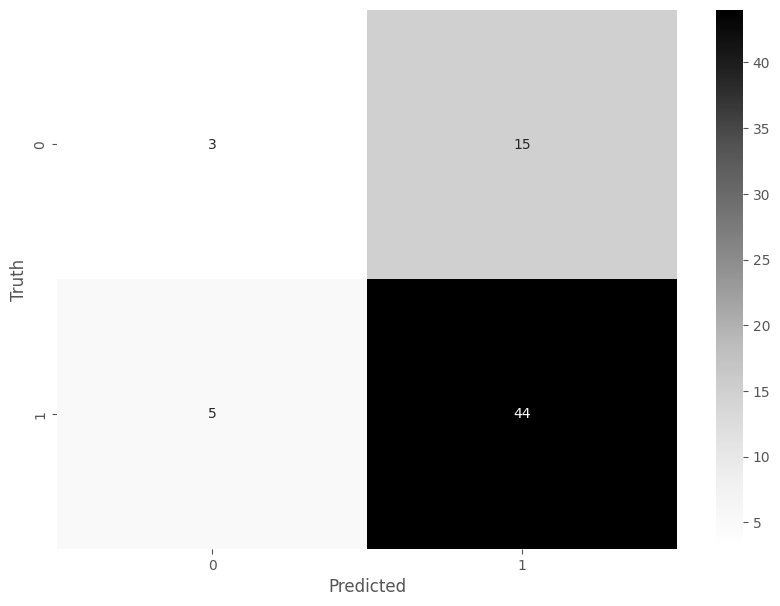

In [62]:
pred = nv.predict(x_test)
cm = confusion_matrix(y_test, pred)

# Visualizar la matriz de confusión
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greys')
plt.xlabel('Predicted')
plt.ylabel('Truth')

plt.show()

Como vemos en la matriz, el **problema persiste**, nuestro clasificador etiqueta todo como "sí" y así tiene un gran número de aciertos, cuando en realidad no está haciendo un buen trabajo.

# Tratando los datos

### Datos erróneos

Antes de nada, cargaremos nuevamente la base de datos. Los primeros datos que vamos a arreglar son:
- Los datos '3+' de Dependents
- Los datos de Coaplicant que tienen números con '.'
- Tratamiento de datos 'atípicos' (como los valores de 'ApplicantIncome' y 'CoapplicantIncome' que son 0)
- Los datos vacíos (NaN)

In [78]:
dataframe = pd.read_csv(r"dataframe/homeLoanAproval.csv",sep=',')

# Cambiamos los '3+' por '3'
dataframe['Dependents'] = dataframe['Dependents'].replace('3+', 3)
# Convertimos la variable en numérica
dataframe['Dependents'] = dataframe['Dependents'].apply(pd.to_numeric)

# Arreglamos los números de Coaplicant
dataframe['CoapplicantIncome'] = dataframe['CoapplicantIncome'].replace(r'\.', '', regex=True)
dataframe['CoapplicantIncome'] = dataframe['CoapplicantIncome'].apply(pd.to_numeric)

dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    float64
 4   Education          614 non-null    object 
 5   SelfEmployed       582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    int64  
 8   LoanAmount         592 non-null    float64
 9   LoanAmountTerm     600 non-null    float64
 10  PropertyArea       614 non-null    object 
 11  LoanStatus         614 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 57.7+ KB


In [79]:
# Quitamos la columna de LOAN_ID, puesto que no aporta información relevante
dataframe = dataframe.drop('Loan_ID', axis=1)

# También quitaremos la columna del género, pues no buscamos clasificar en base a él
dataframe = dataframe.drop('Gender', axis=1)

In [80]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Married            611 non-null    object 
 1   Dependents         599 non-null    float64
 2   Education          614 non-null    object 
 3   SelfEmployed       582 non-null    object 
 4   ApplicantIncome    614 non-null    int64  
 5   CoapplicantIncome  614 non-null    int64  
 6   LoanAmount         592 non-null    float64
 7   LoanAmountTerm     600 non-null    float64
 8   PropertyArea       614 non-null    object 
 9   LoanStatus         614 non-null    object 
dtypes: float64(3), int64(2), object(5)
memory usage: 48.1+ KB


Comprobemos mediante un **histograma** si hay datos atípicos en las columnas numéricas.

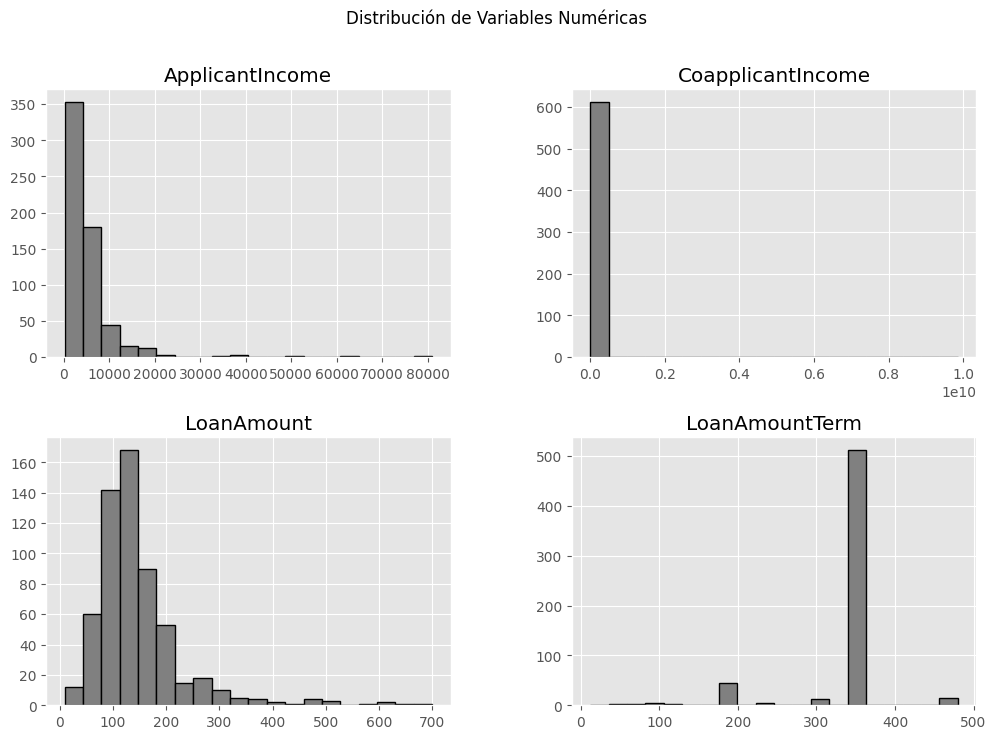

In [81]:
# Generamos un histograma para las variables numéricas
numerical_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'LoanAmountTerm']
dataframe[numerical_columns].hist(figsize=(12, 8), bins=20, color='gray', edgecolor='black', linewidth=1.0)
plt.suptitle('Distribución de Variables Numéricas')
plt.show()


In [82]:
# Eliminamos los outliers por encima de sus valores atípicos
dataframe = dataframe[dataframe['ApplicantIncome'] < 20000]
dataframe = dataframe[dataframe['CoapplicantIncome'] < 10000]
dataframe = dataframe[dataframe['LoanAmount'] < 400]
dataframe = dataframe[dataframe['LoanAmountTerm'] < 500]

In [83]:
# En los datos vacíos o NaN, pondremos la media en los datos numéricos y la moda en los categóricos
dataframe['Married'] = dataframe['Married'].fillna(dataframe['Married'].mode()[0])
dataframe['Dependents'] = dataframe['Dependents'].fillna(dataframe['Dependents'].mean())
dataframe['Education'] = dataframe['Education'].fillna(dataframe['Education'].mode()[0])
dataframe['SelfEmployed'] = dataframe['SelfEmployed'].fillna(dataframe['SelfEmployed'].mode()[0])
dataframe['ApplicantIncome'] = dataframe['ApplicantIncome'].fillna(dataframe['ApplicantIncome'].mean())
dataframe['CoapplicantIncome'] = dataframe['CoapplicantIncome'].fillna(dataframe['CoapplicantIncome'].mean())
dataframe['LoanAmount'] = dataframe['LoanAmount'].fillna(dataframe['LoanAmount'].mean())
dataframe['LoanAmountTerm'] = dataframe['LoanAmountTerm'].fillna(dataframe['LoanAmountTerm'].mean())
dataframe['PropertyArea'] = dataframe['PropertyArea'].fillna(dataframe['PropertyArea'].mode()[0])

In [84]:
# Comprobamos que no queda ningún dato vacío
dataframe.isnull().sum()

Married              0
Dependents           0
Education            0
SelfEmployed         0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
LoanAmountTerm       0
PropertyArea         0
LoanStatus           0
dtype: int64

In [85]:
dataframe.head()

Married  Dependents     Education SelfEmployed  ApplicantIncome  \
1     Yes         1.0      Graduate           No             4583   
2     Yes         0.0      Graduate          Yes             3000   
3     Yes         0.0  Not Graduate           No             2583   
4      No         0.0      Graduate           No             6000   
5     Yes         2.0      Graduate          Yes             5417   

   CoapplicantIncome  LoanAmount  LoanAmountTerm PropertyArea LoanStatus  
1               1508       128.0           360.0        Rural          N  
2                  0        66.0           360.0        Urban          Y  
3               2358       120.0           360.0        Urban          Y  
4                  0       141.0           360.0        Urban          Y  
5               4196       267.0           360.0        Urban          Y

Ahora, comprobemos si estamos ante un caso de **clases desbalanceadas**.

In [86]:
# Comprobamos el desbalanceo
dataframe['LoanStatus'].value_counts()

LoanStatus
Y    386
N    165
Name: count, dtype: int64

Como efectivamente lo estamos, ya que tenemos muchos más valores de "Sí" que de "No", balancearemos las clases haciendo la técnica de **oversampling**, la cual consiste en aumentar el número de registros de la clase con menor frecuencia.

In [87]:
# Balanceamos con oversampling
from sklearn.utils import resample

# Separamos por clases
denied = dataframe[dataframe['LoanStatus'] == 'N']
approved = dataframe[dataframe['LoanStatus'] == 'Y']

# Hacemos oversampling de la clase minoritaria
denied_upsampled = resample(denied,
                            replace=True,
                            n_samples=len(approved),
                            random_state=27)

# Combinamos las clases
upsampled = pd.concat([approved, denied_upsampled])

# Comprobamos que estén balanceadas
upsampled['LoanStatus'].value_counts()

LoanStatus
Y    386
N    386
Name: count, dtype: int64

In [88]:
# Los clasificadores que estamos usando no aceptan valores categóricos, por ello hay que pasarlos a valores numéricos
le = LabelEncoder()
for col in upsampled.columns:
    if upsampled[col].dtype == 'object':
        upsampled[col] = le.fit_transform(upsampled[col])

Repitamos el mismo proceso con este clasificador, pero ahora con los datos tratados, el cual nos deberia dar un mejor resultado.

In [89]:
upsampled.head()

Married  Dependents  Education  SelfEmployed  ApplicantIncome  \
2        1         0.0          0             1             3000   
3        1         0.0          1             0             2583   
4        0         0.0          0             0             6000   
5        1         2.0          0             1             5417   
6        1         0.0          1             0             2333   

   CoapplicantIncome  LoanAmount  LoanAmountTerm  PropertyArea  LoanStatus  
2                  0        66.0           360.0             2           1  
3               2358       120.0           360.0             2           1  
4                  0       141.0           360.0             2           1  
5               4196       267.0           360.0             2           1  
6               1516        95.0           360.0             2           1

<Axes: >

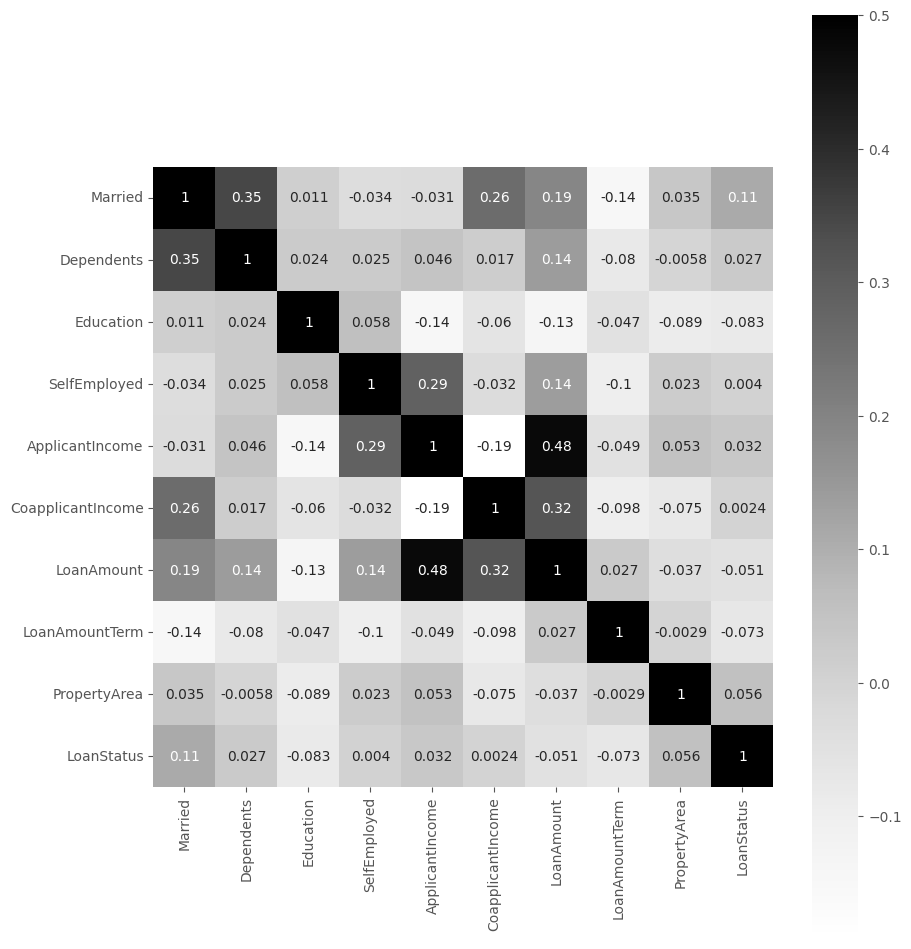

In [90]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
newdf = upsampled.select_dtypes(include=numerics)

# Veamos la correlación entre los datos
matrix = newdf.corr()
f, ax = plt.subplots(figsize=(10, 12))
sns.heatmap(matrix, vmax=.5, square=True, cmap="Greys", annot=True)

In [91]:
# Quitamos las variables que generan ruido
upsampled = upsampled.drop('Education', axis=1)
upsampled = upsampled.drop('Dependents', axis=1)
upsampled = upsampled.drop('SelfEmployed', axis=1)
upsampled = upsampled.drop('CoapplicantIncome', axis=1)

## k-Nearest Neighbours (K-NN)

In [92]:
# Para el clasificador K-NN, como usa distancias, usaremos solo las variables numéricas
k_upsampled_fixed = upsampled
k_upsampled_fixed.drop('Married', axis=1)
k_upsampled_fixed.drop('PropertyArea', axis=1)

Married  ApplicantIncome  LoanAmount  LoanAmountTerm  LoanStatus
2          1             3000        66.0           360.0           1
3          1             2583       120.0           360.0           1
4          0             6000       141.0           360.0           1
5          1             5417       267.0           360.0           1
6          1             2333        95.0           360.0           1
..       ...              ...         ...             ...         ...
412        1             6096       218.0           360.0           0
65         1             5726       258.0           360.0           0
148        0            10000       225.0           360.0           0
541        0             2138        99.0           360.0           0
195        1             3125       170.0           360.0           0

[772 rows x 5 columns]

In [93]:
k_upsampled_fixed.head()

Married  ApplicantIncome  LoanAmount  LoanAmountTerm  PropertyArea  \
2        1             3000        66.0           360.0             2   
3        1             2583       120.0           360.0             2   
4        0             6000       141.0           360.0             2   
5        1             5417       267.0           360.0             2   
6        1             2333        95.0           360.0             2   

   LoanStatus  
2           1  
3           1  
4           1  
5           1  
6           1

In [94]:
x = k_upsampled_fixed.drop('LoanStatus', axis=1)
y = k_upsampled_fixed['LoanStatus'].values

In [95]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

In [ ]:
n_neighbors = 7

knn = KNeighborsClassifier(n_neighbors)
knn.fit(x_train, y_train)

In [97]:
print('Accuracy of K-NN classifier on training set: {:.2f}'.format(knn.score(x_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'.format(knn.score(x_test, y_test)))

Accuracy of K-NN classifier on training set: 0.72
Accuracy of K-NN classifier on test set: 0.66


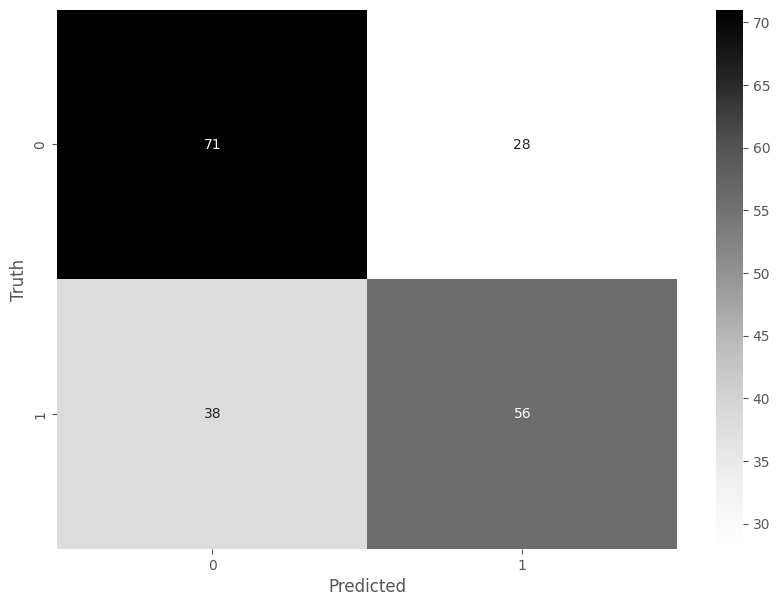

In [98]:
pred = knn.predict(x_test)
cm = confusion_matrix(y_test, pred)

# Visualizamos la matriz de confusión generada
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greys')
plt.xlabel('Predicted')
plt.ylabel('Truth')

plt.show()

En la figura de arriba, podemos ver que ahora nuestro clasificador **ya no clasifica todo en "sí"** como antes, ahora tiene una mejor predicción.

## Árbol de clasificación

Usando la tabla a la que le quitamos las variables que generaban ruido del apartado anterior.

In [99]:
upsampled.head()

Married  ApplicantIncome  LoanAmount  LoanAmountTerm  PropertyArea  \
2        1             3000        66.0           360.0             2   
3        1             2583       120.0           360.0             2   
4        0             6000       141.0           360.0             2   
5        1             5417       267.0           360.0             2   
6        1             2333        95.0           360.0             2   

   LoanStatus  
2           1  
3           1  
4           1  
5           1  
6           1

In [100]:
x = upsampled.drop('LoanStatus', axis=1)
y = upsampled['LoanStatus'].values

In [101]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

In [102]:
clf = DecisionTreeClassifier()
clf = clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

In [103]:
print('Accuracy of classifier on training set: {:.2f}'.format(clf.score(x_train, y_train)))
print('Accuracy of classifier on test set: {:.2f}'.format(clf.score(x_test, y_test)))

Accuracy of classifier on training set: 1.00
Accuracy of classifier on test set: 0.78


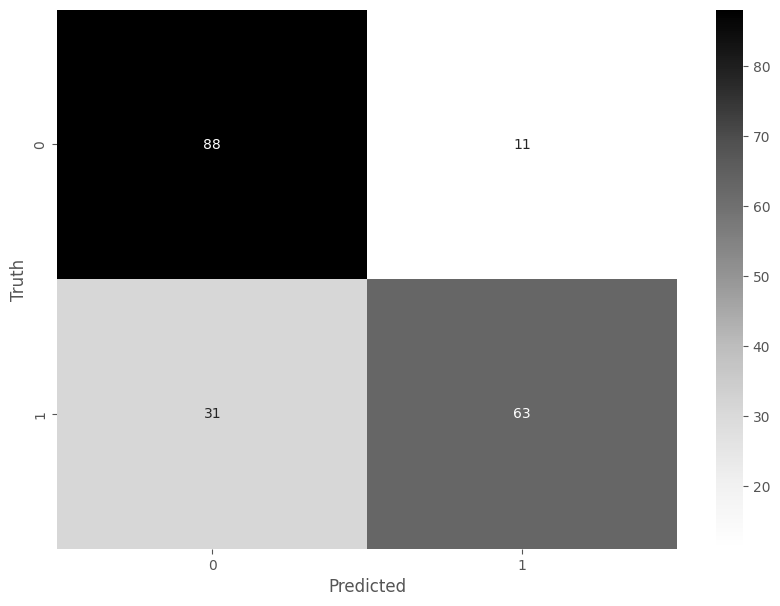

In [104]:
pred = clf.predict(x_test)
cm = confusion_matrix(y_test, pred)

# Visualizamos la matriz de confusión generada
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greys')
plt.xlabel('Predicted')
plt.ylabel('Truth')

plt.show()

Veamos ahora el árbol generado a partir del nuevo modelo.

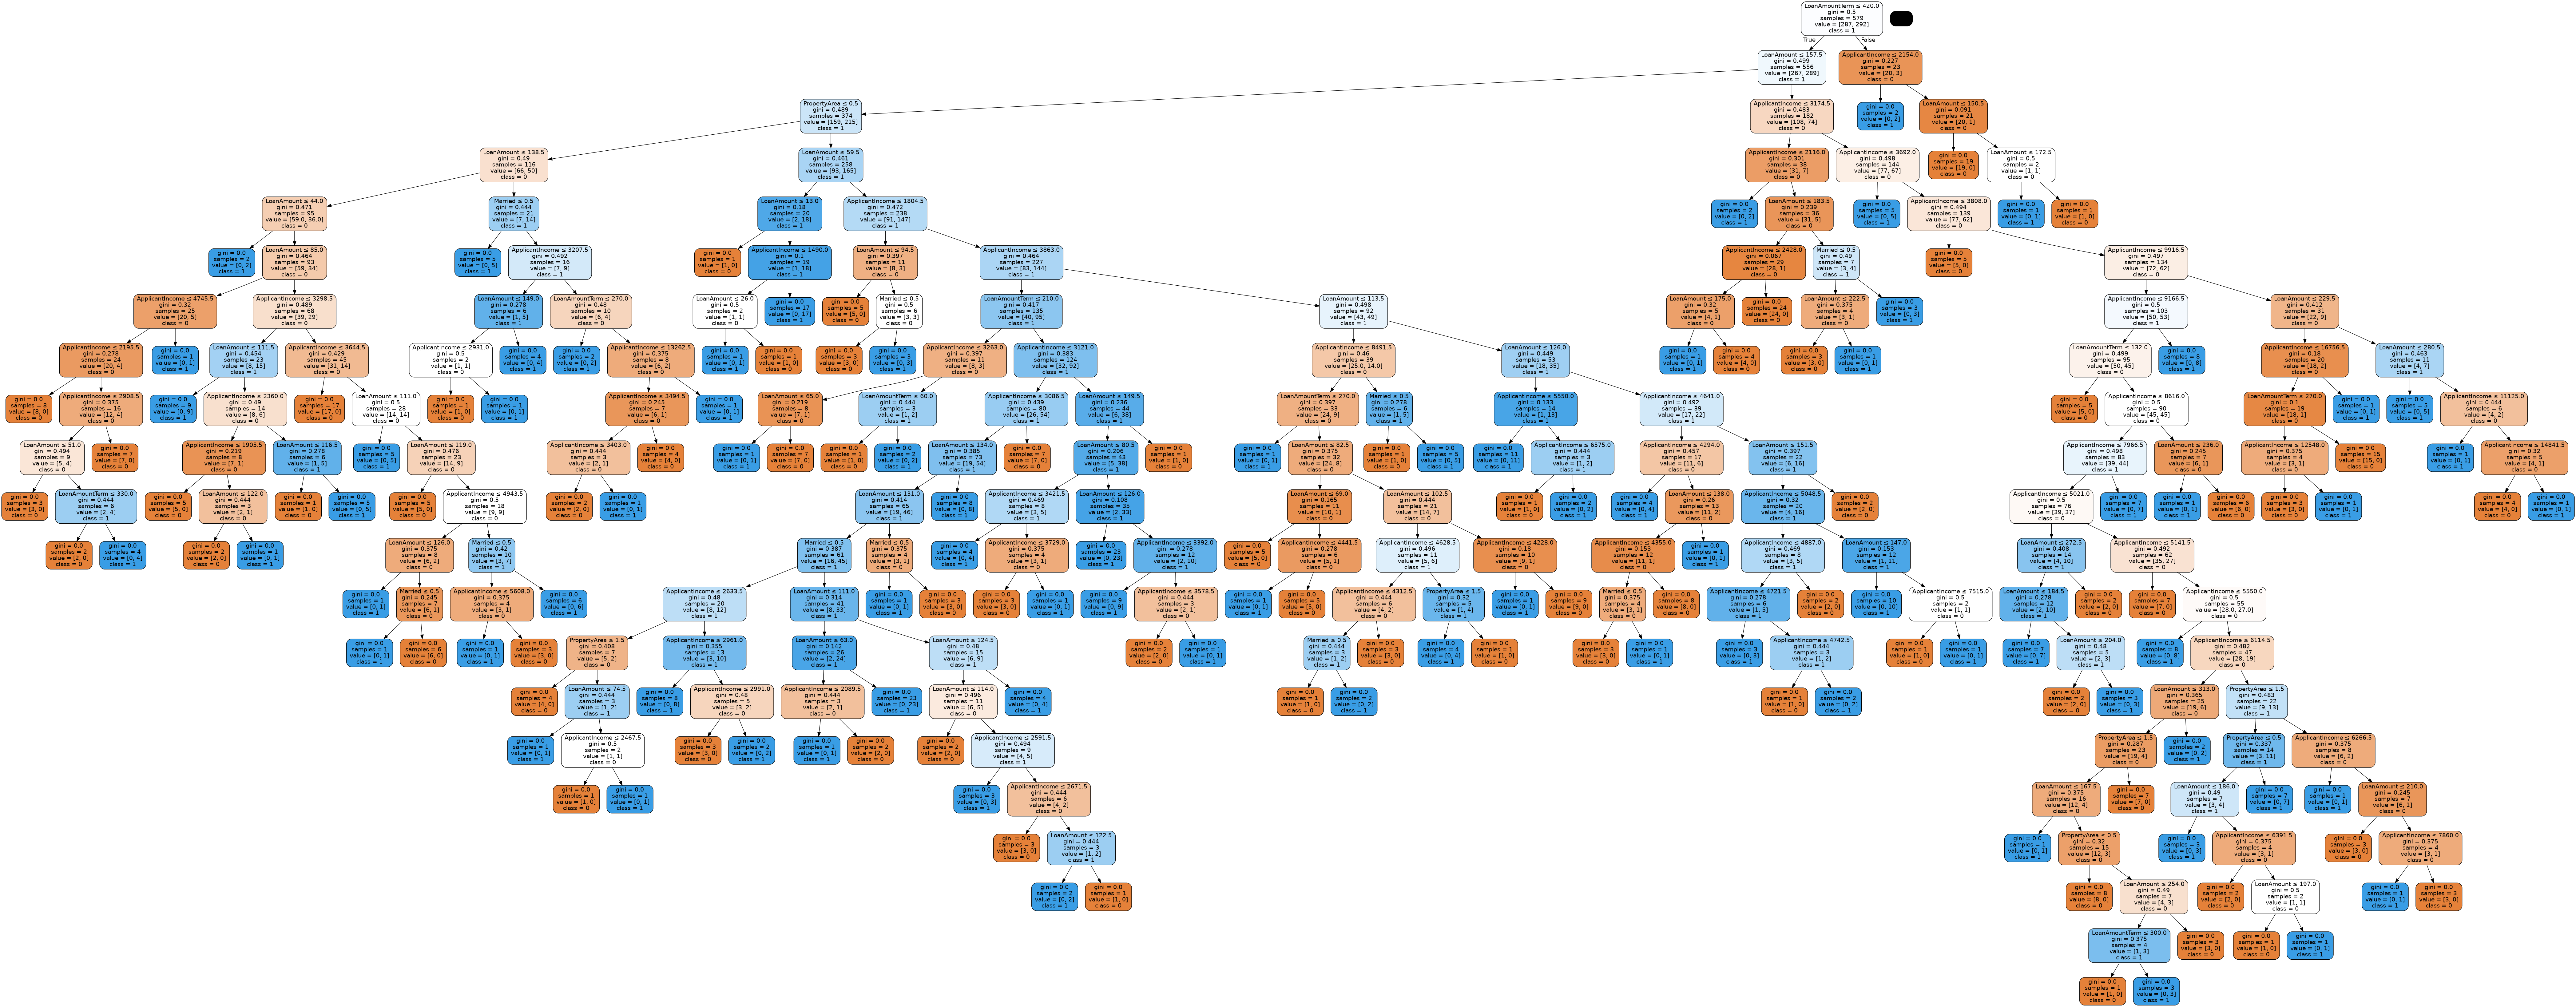

In [105]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, 
                rounded=True,
                special_characters=True,
                feature_names = upsampled.columns.drop('LoanStatus'),
                class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('images/unpruned-tree.png')
Image(graph.create_png())

Hagamos una poda para una mejor visualización, con la consecuencia de un peor clasificador.

In [106]:
clf = DecisionTreeClassifier(criterion="gini", max_depth=6)

clf = clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)

print('Accuracy of classifier on training set: {:.2f}'.format(clf.score(x_train, y_train)))
print('Accuracy of classifier on test set: {:.2f}'.format(clf.score(x_test, y_test)))

Accuracy of classifier on training set: 0.69
Accuracy of classifier on test set: 0.60


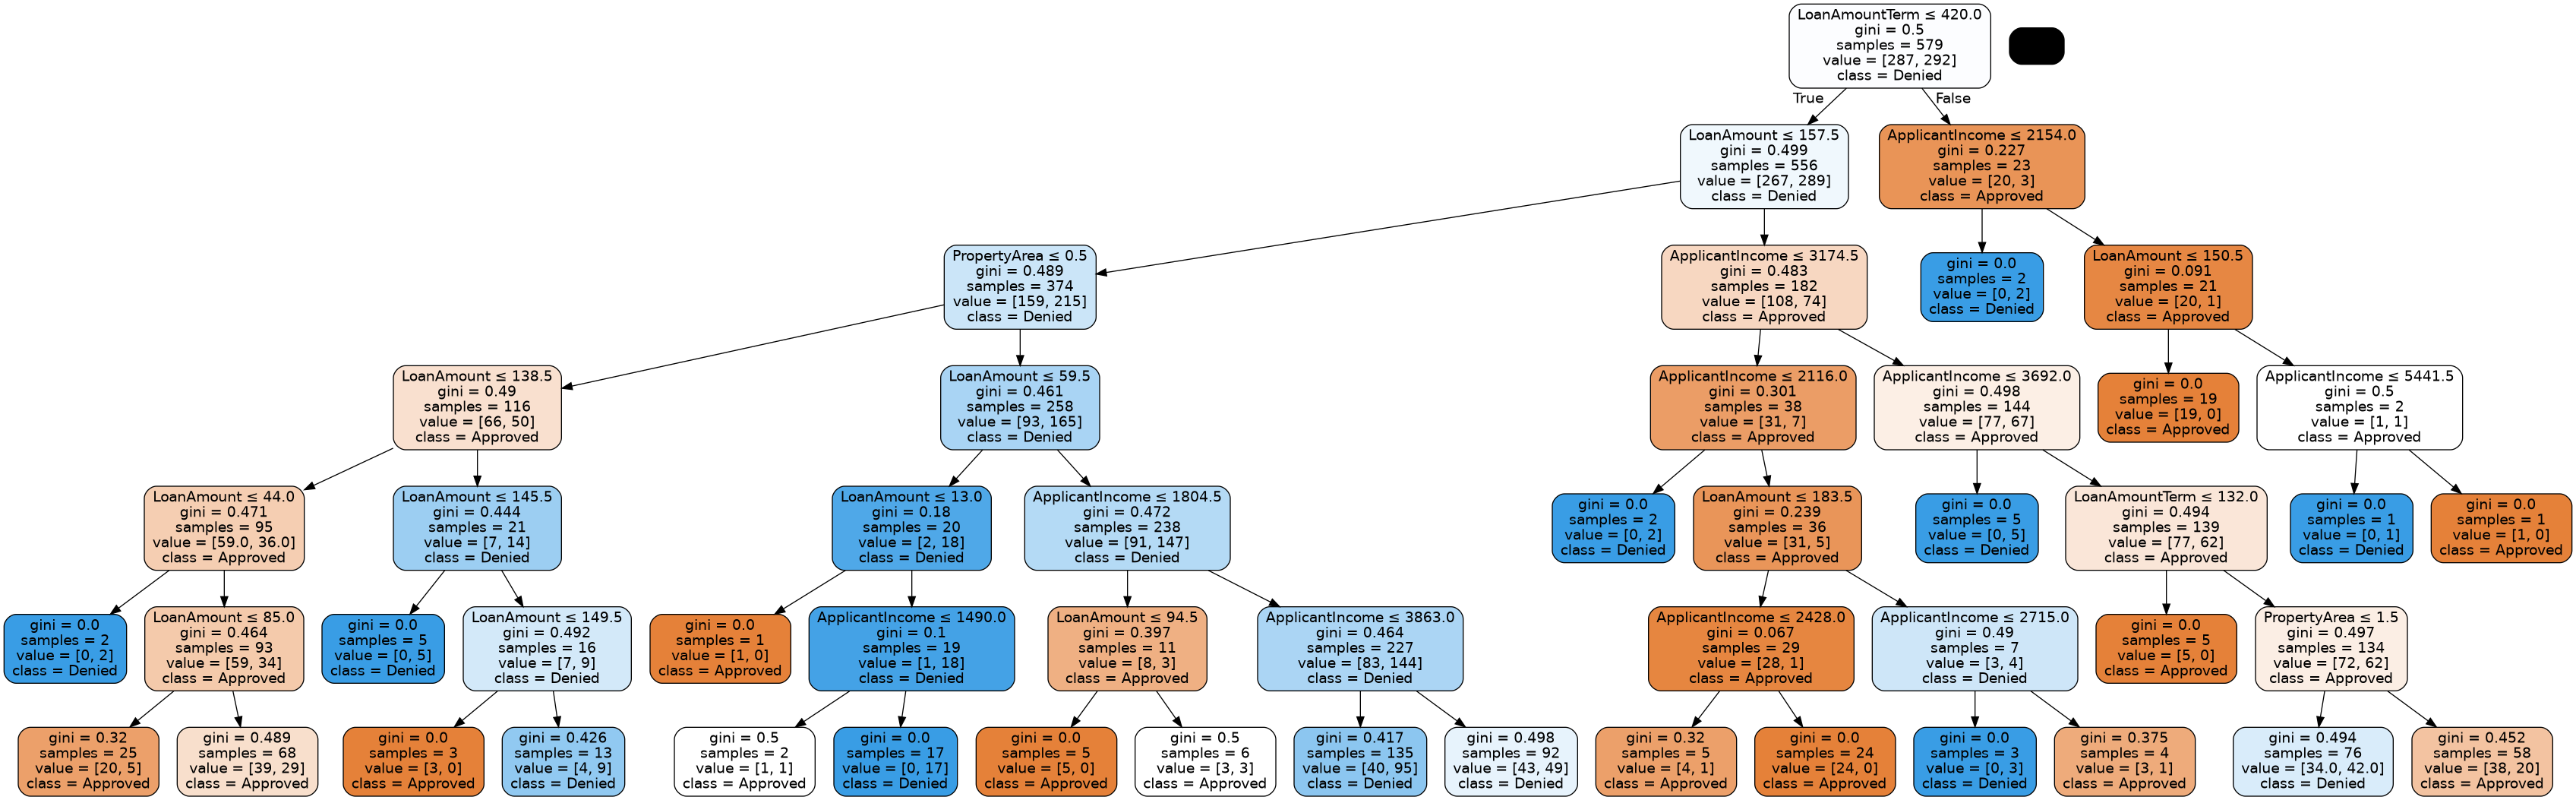

In [107]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                class_names=['Approved', 'Denied'], # Ajusta los nombres de las clases según tus datos
                filled=True, 
                rounded=True,
                special_characters=True,
                feature_names = upsampled.columns.drop('LoanStatus'))
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('images/pruned-tree.png')
Image(graph.create_png())

## Naive-Bayes

Usando la misma tabla a la que le habiamos quitamos las variables que generaban ruido.

In [108]:
upsampled.head()

Married  ApplicantIncome  LoanAmount  LoanAmountTerm  PropertyArea  \
2        1             3000        66.0           360.0             2   
3        1             2583       120.0           360.0             2   
4        0             6000       141.0           360.0             2   
5        1             5417       267.0           360.0             2   
6        1             2333        95.0           360.0             2   

   LoanStatus  
2           1  
3           1  
4           1  
5           1  
6           1

In [109]:
# Reestablecemos las variables
x = upsampled.drop('LoanStatus', axis=1)
y = upsampled['LoanStatus'].values

In [110]:
# Separamos los datos
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=10)

In [ ]:
nv = GaussianNB()
nv = nv.fit(x_train, y_train)
y_pred = nv.predict(x_test)
y_pred

In [112]:
print('Accuracy of classifier on training set: {:.2f}'.format(nv.score(x_train, y_train)))
print('Accuracy of classifier on test set: {:.2f}'.format(nv.score(x_test, y_test)))

Accuracy of classifier on training set: 0.57
Accuracy of classifier on test set: 0.54


Puesto que no se observa una mejoría notable en los porcentajes de acierto, veamos mejor la matriz de confusión.

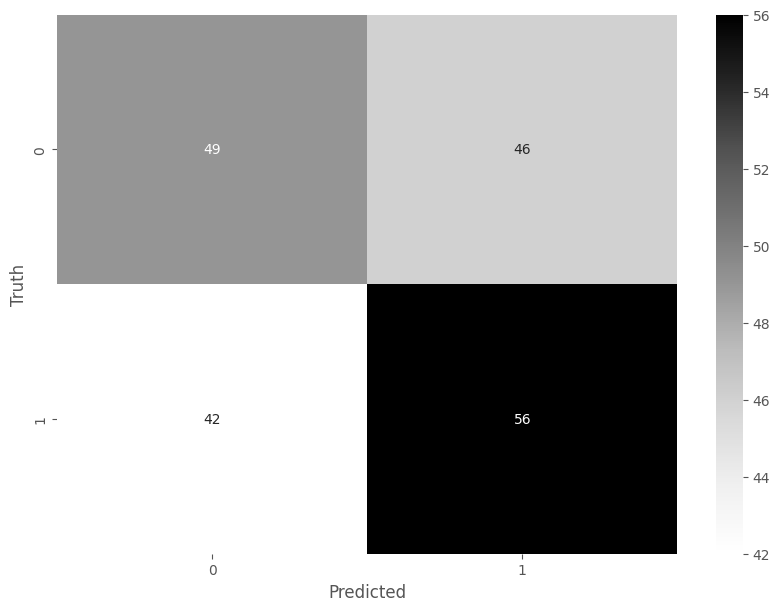

In [113]:
pred = nv.predict(x_test)
cm = confusion_matrix(y_test, pred)

# Visualizar la matriz de confusión
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greys')
plt.xlabel('Predicted')
plt.ylabel('Truth')

plt.show()

En este caso nuestro clasificador ha empeorado considerablemente. No solo que **no se decanta por ninguna opción**, sino que más bien parece colocar la mitad en cada uno de los sucesos. Ya que el clasificador Naive Bayes es capaz de detectar que, en nuestros datos, hay un 50% de "Sí" y un 50% de "No", a este algoritmo le viene mejor no balancear las clases.